In [ ]:
#AI_머신러닝_딥러닝_개발 #미니실습

# MLP,
# 다층 신경망을 이용해서,
# 간단한
# 모델을 만들어서,
# 샘플 모델,
# class Regressor(nn.Module):
# def __init__(self):
# super().__init__() # 모델 연산 정의
# self.fc1 = nn.Linear(13, 50) # 입력층(13) -> 은닉층1(50)으로 가는 연산
# self.fc2 = nn.Linear(50, 30) # 은닉층1(50) -> 은닉층2(30)으로 가는 연산
# self.fc3 = nn.Linear(30, 1) # 은닉층2(30) -> 출력층(1)으로 가는 연산
# self.dropout = nn.Dropout(0.5) # 연산이 될 때마다 50%의 비율로 랜덤하게 노드를 없앤다.
# 활용을 해서,


# 활성화 함수 : ReLu
# 손실 함수 : MSE ,
# 최적화 함수 : Adam
# 은닉층은, 2계층 정도 구성을해서,
# 학습은 약 1000회,
# 배치 : 32개 정도,
#
# 와인 품질 등급 측정은 모델을 만들고,
# 손실값, 예측값 그래프 확인.

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix

In [4]:
# 데이터 로드 (와인 데이터셋 예제)
from sklearn.datasets import load_wine
data = load_wine()
X = data.data
y = data.target.astype(np.float32)  # 회귀 문제를 위해 float 변환

In [5]:
# 데이터 전처리
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Tensor 변환
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1)

In [7]:
# 데이터 로더 생성
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [8]:
# MLP 모델 정의
class Regressor(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(13, 50)
        self.fc2 = nn.Linear(50, 30)
        self.fc3 = nn.Linear(30, 1)
        self.dropout = nn.Dropout(0.5)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x

In [9]:
# 모델 초기화
model = Regressor()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [10]:
# 학습
epochs = 1000
losses = []
for epoch in range(epochs):
    model.train()
    epoch_loss = 0
    for batch_X, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    losses.append(epoch_loss / len(train_loader))
    if epoch % 100 == 0:
        print(f"Epoch {epoch}/{epochs}, Loss: {epoch_loss / len(train_loader):.4f}")

Epoch 0/1000, Loss: 1.2501
Epoch 100/1000, Loss: 0.1986
Epoch 200/1000, Loss: 0.1147
Epoch 300/1000, Loss: 0.0941
Epoch 400/1000, Loss: 0.1017
Epoch 500/1000, Loss: 0.0595
Epoch 600/1000, Loss: 0.0603
Epoch 700/1000, Loss: 0.0646
Epoch 800/1000, Loss: 0.0619
Epoch 900/1000, Loss: 0.0320


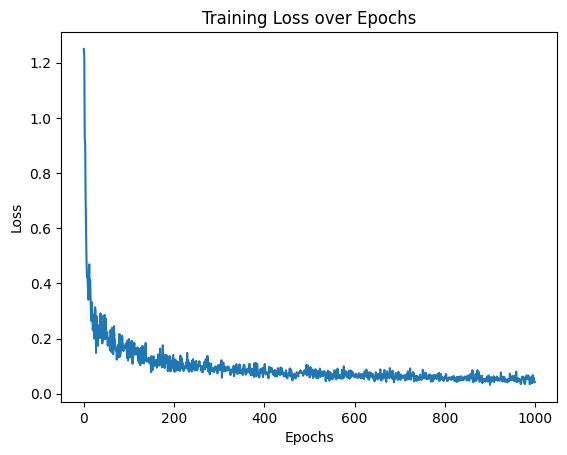

In [11]:
# 손실 그래프
plt.plot(losses)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.show()

In [12]:
# 모델 평가
model.eval()
preds = []
true_vals = []
with torch.no_grad():
    for batch_X, batch_y in test_loader:
        pred = model(batch_X)
        preds.extend(pred.numpy().flatten())
        true_vals.extend(batch_y.numpy().flatten())

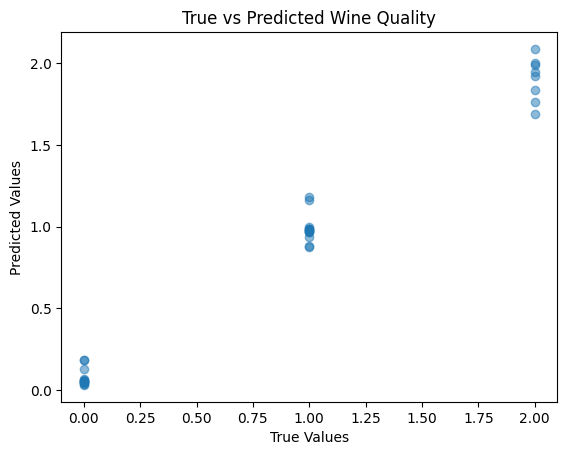

In [13]:
# 예측값 시각화
plt.scatter(true_vals, preds, alpha=0.5)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Wine Quality')
plt.show()

In [14]:
# 혼동 행렬 계산 및 출력
pred_classes = np.round(preds).astype(int)
true_classes = np.round(true_vals).astype(int)
cm = confusion_matrix(true_classes, pred_classes)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]
